# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
 

### Generate the Cities List by Using the `citipy` Library

In [26]:
#Generate the Cities List by Using the citipy Library

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)# Dependencies and Setup

lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [30]:
# Set the API base URL
url = base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        
        city_weather = response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({ 
            "City": city, 
            "Lat": city_lat, 
            "Lng": city_lng, 
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": time.ctime(city_date)
        })
        
    # If an error is experienced, skip the city
    except:
        #print(f"City not found. Skipping...")
        pass
    
              
# Indicate that Data Loading is complete 
print("-----------------------------")
    
print("Data Retrieval Complete      ")

print("-----------------------------")
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | vila velha
Processing Record 5 of Set 1 | troy
Processing Record 6 of Set 1 | nar'yan-mar
Processing Record 7 of Set 1 | kailua-kona
Processing Record 8 of Set 1 | wynyard
Processing Record 9 of Set 1 | illizi
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | vingt cinq
Processing Record 12 of Set 1 | aykhal
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | ponta delgada
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | labrador city
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | kirensk
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | bardai
Processing Record 22 of Set 1 | san 

Processing Record 42 of Set 4 | cannonvale
Processing Record 43 of Set 4 | midvagur
Processing Record 44 of Set 4 | badiyah
Processing Record 45 of Set 4 | mbeni
Processing Record 46 of Set 4 | fort mcmurray
Processing Record 47 of Set 4 | salekhard
Processing Record 48 of Set 4 | jesup
Processing Record 49 of Set 4 | nabire
Processing Record 0 of Set 5 | ulladulla
Processing Record 1 of Set 5 | armacao de buzios
Processing Record 2 of Set 5 | papatowai
Processing Record 3 of Set 5 | sur
Processing Record 4 of Set 5 | petukhovo
Processing Record 5 of Set 5 | brisas de zicatela
Processing Record 6 of Set 5 | boende
Processing Record 7 of Set 5 | atbasar
Processing Record 8 of Set 5 | fort william
Processing Record 9 of Set 5 | fale old settlement
Processing Record 10 of Set 5 | papao
Processing Record 11 of Set 5 | vernon
Processing Record 12 of Set 5 | acarau
Processing Record 13 of Set 5 | wangjing
Processing Record 14 of Set 5 | seven pagodas
Processing Record 15 of Set 5 | katabu
Pr

Processing Record 39 of Set 8 | viveiro
Processing Record 40 of Set 8 | itapirapua
Processing Record 41 of Set 8 | paradera
Processing Record 42 of Set 8 | zhanaozen
Processing Record 43 of Set 8 | nizao
Processing Record 44 of Set 8 | makary
Processing Record 45 of Set 8 | baharly
Processing Record 46 of Set 8 | melo
Processing Record 47 of Set 8 | hammerfest
Processing Record 48 of Set 8 | cadale
Processing Record 49 of Set 8 | ketchikan
Processing Record 0 of Set 9 | okha
Processing Record 1 of Set 9 | ouellah
Processing Record 2 of Set 9 | usinsk
Processing Record 3 of Set 9 | kuanda
Processing Record 4 of Set 9 | tofol
Processing Record 5 of Set 9 | ebon
Processing Record 6 of Set 9 | mirny
Processing Record 7 of Set 9 | wuyang
Processing Record 8 of Set 9 | la mojonera
Processing Record 9 of Set 9 | igrim
Processing Record 10 of Set 9 | nema
Processing Record 11 of Set 9 | robore
Processing Record 12 of Set 9 | palikir - national government center
Processing Record 13 of Set 9 | 

Processing Record 35 of Set 12 | bogande
Processing Record 36 of Set 12 | laguna paiva
Processing Record 37 of Set 12 | surgana
Processing Record 38 of Set 12 | north bend
Processing Record 39 of Set 12 | mount gambier
Processing Record 40 of Set 12 | ouadda
Processing Record 41 of Set 12 | zhangye
Processing Record 42 of Set 12 | pionerskiy
Processing Record 43 of Set 12 | calama
Processing Record 44 of Set 12 | talghar
Processing Record 45 of Set 12 | usogorsk
Processing Record 46 of Set 12 | kindu
Processing Record 47 of Set 12 | maues
Processing Record 48 of Set 12 | codrington
Processing Record 49 of Set 12 | kizhinga
Processing Record 0 of Set 13 | komatipoort
Processing Record 1 of Set 13 | gore
Processing Record 2 of Set 13 | revda
Processing Record 3 of Set 13 | dikwa
Processing Record 4 of Set 13 | amga
Processing Record 5 of Set 13 | santiago de cuba
Processing Record 6 of Set 13 | ta`u
Processing Record 7 of Set 13 | sirte
-----------------------------
Data Retrieval Comple

In [31]:
print(len(city_data))  # This should show the number of items in the list
#print(city_data[:5])  # This will print the first 5 items in the list


583


In [32]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

print(city_data_df.count())

city_data_df.info()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        583 non-null    object 
 1   Lat         583 non-null    float64
 2   Lng         583 non-null    float64
 3   Max Temp    583 non-null    float64
 4   Humidity    583 non-null    int64  
 5   Cloudiness  583 non-null    int64  
 6   Wind Speed  583 non-null    float64
 7   Country     583 non-null    object 
 8   Date        583 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 41.1+ KB


In [33]:
# Export the City_Data into a csv
# Assuming 'city_data_df' is your DataFrame
city_data_df.to_csv("output_data/city_weather_data.csv", index=False)


In [1]:
import pandas as pd
import os

# Read saved data
city_data_df = pd.read_csv("output_data/city_weather_data.csv")

# Display the first few rows of the DataFrame to verify its contents
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,0.23,74,46,0.89,US,Wed Feb 21 22:10:59 2024
1,bilibino,68.0546,166.4372,-29.07,91,97,3.39,RU,Wed Feb 21 22:12:32 2024
2,edinburgh of the seven seas,-37.0676,-12.3116,18.65,92,100,12.36,SH,Wed Feb 21 22:12:33 2024
3,vila velha,-20.3297,-40.2925,24.97,94,100,5.81,BR,Wed Feb 21 22:12:33 2024
4,troy,42.6056,-83.1499,11.80,62,40,2.06,US,Wed Feb 21 22:12:33 2024
...,...,...,...,...,...,...,...,...,...
578,dikwa,12.0240,13.9165,23.93,40,82,3.19,NG,Wed Feb 21 22:15:24 2024
579,amga,60.8953,131.9608,-24.77,89,100,2.99,RU,Wed Feb 21 22:15:24 2024
580,santiago de cuba,20.0247,-75.8219,19.06,68,20,4.12,CU,Wed Feb 21 22:15:25 2024
581,ta`u,-14.2336,-169.5144,28.75,75,11,3.83,AS,Wed Feb 21 22:15:25 2024


In [35]:
import pandas as pd
import os

file_path = "output_data/city_weather_data.csv"

# Check if the file exists
if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
    city_data_df = pd.read_csv(file_path)
    # Display the first few rows of the DataFrame to verify its contents
    print(city_data_df.head())
else:
    print(f"File not found or is empty at {file_path}")


                          City      Lat       Lng  Max Temp  Humidity  \
0                       albany  42.6001  -73.9662      0.23        74   
1                     bilibino  68.0546  166.4372    -29.07        91   
2  edinburgh of the seven seas -37.0676  -12.3116     18.65        92   
3                   vila velha -20.3297  -40.2925     24.97        94   
4                         troy  42.6056  -83.1499     11.80        62   

   Cloudiness  Wind Speed Country                      Date  
0          46        0.89      US  Wed Feb 21 22:10:59 2024  
1          97        3.39      RU  Wed Feb 21 22:12:32 2024  
2         100       12.36      SH  Wed Feb 21 22:12:33 2024  
3         100        5.81      BR  Wed Feb 21 22:12:33 2024  
4          40        2.06      US  Wed Feb 21 22:12:33 2024  


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [36]:
def showChart(x,y,title):
    plt.figure(figsize=[12,4])
    plt.scatter(x, y, 
                edgecolor='black', linewidth=1, marker='o', alpha=0.8)

    # Add titles and labels
    plt.title(f"City Latitude vs. {title} ({time.strftime('%Y-%m-%d')})")
    plt.xlabel('Latitude')
    plt.ylabel(title)

    # Add a grid
    plt.grid(True)

    # Save
    plt.savefig(f'output_data/Latitude_vs_{title}.png')

    # Show the plot
    plt.show()

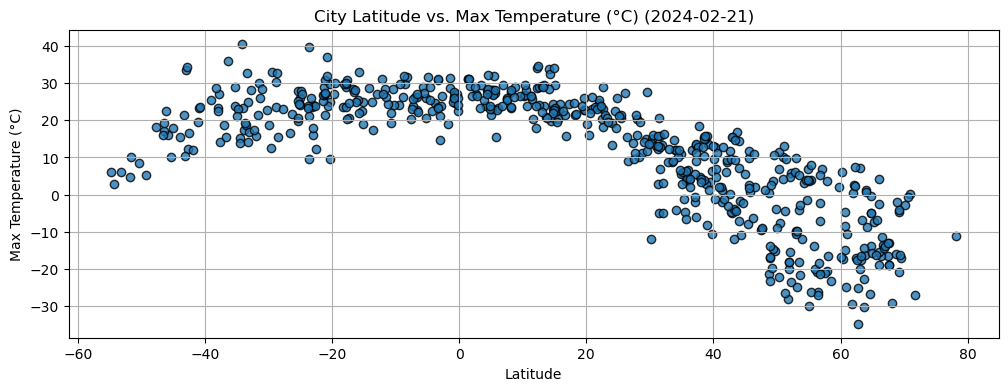

In [37]:
# Build scatter plot for latitude vs. temperature

x = city_data_df['Lat']
y = city_data_df['Max Temp']
title = 'Max Temperature (°C)'

showChart(x,y,title)

#### Latitude Vs. Humidity

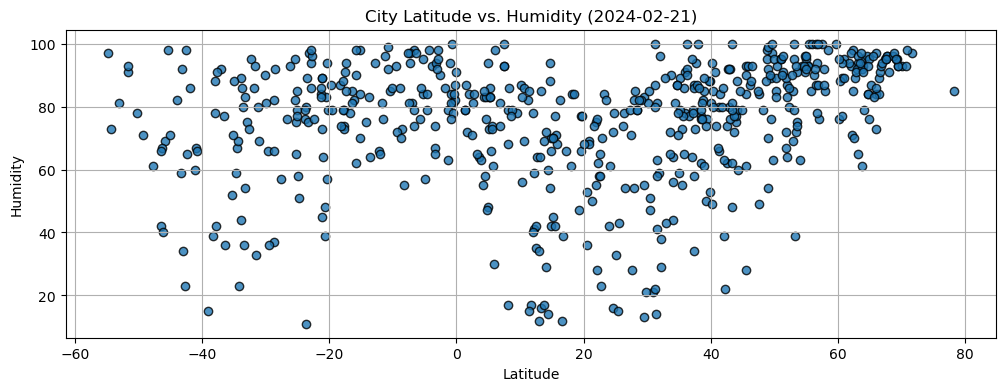

In [38]:
# Incorporate the other graph properties
# Assuming 'city_data_df' is your DataFrame and it contains 'Lat' for latitude and 'Humidity' for humidity
# Set the figure size for better readability
# Create the scatter plot with color based on Humidity
# Add titles and axis labels with customization
# Add a color bar to indicate humidity levels
# Add grid lines
# Show the plot
# Save the figure
# Show plot
showChart(x,city_data_df.Humidity,'Humidity')

#### Latitude Vs. Cloudiness

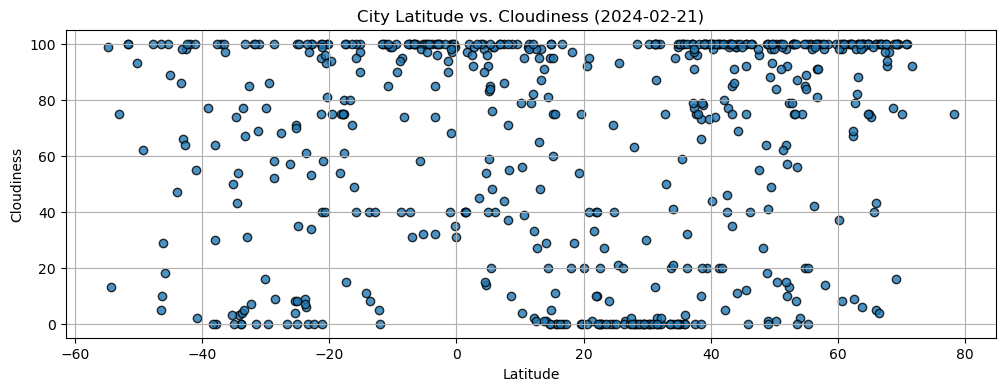

In [39]:
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
title = 'Cloudiness'

showChart(x,y,title)

#### Latitude Vs. Wind Speed

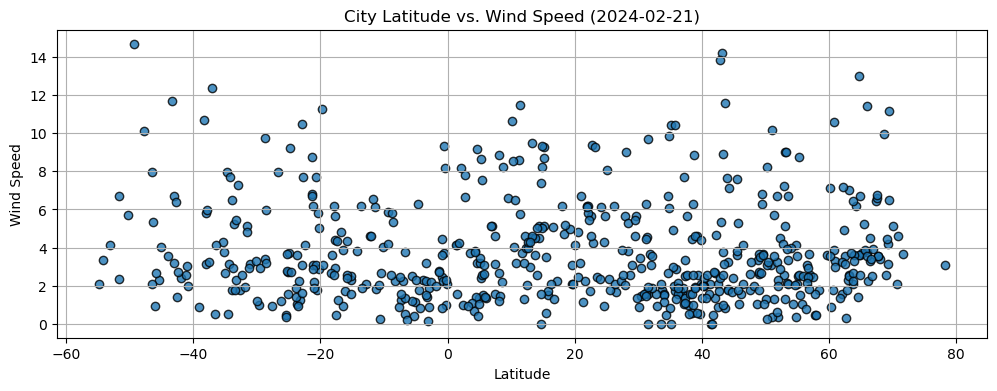

In [40]:
#### Latitude vs. Wind Speed Plot
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
title = 'Wind Speed'

showChart(x,y,title)

---

## Requirement 2: Compute Linear Regression for Each Relationship


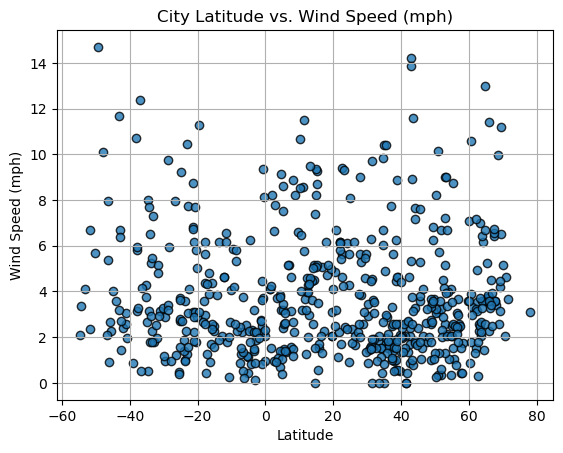

In [41]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the weather_data.csv file
#df = pd.read_csv('/mnt/data/city_weather_data.csv')
df = city_data_df
# Ensure the 'Lat' and 'Wind Speed' columns exist in the DataFrame
if 'Lat' in df.columns and 'Wind Speed' in df.columns:
    # Build the scatter plot for latitude vs. wind speed
    plt.scatter(df['Lat'], df['Wind Speed'], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

    # Incorporate the other graph properties
    plt.title("City Latitude vs. Wind Speed (mph)")
    plt.ylabel("Wind Speed (mph)")
    plt.xlabel("Latitude")
    plt.grid(True)

    # Save the figure to the /mnt/data/ directory
    plt.savefig("city_data_df")

    # Show plot
    plt.show()
else:
    print("The required columns 'Lat' and/or 'Wind Speed' are not present in the DataFrame.")


###  Temperature vs. Latitude Linear Regression Plot

In [42]:
def showChart2(x,y,title):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, 
                edgecolor='black', linewidth=1, marker='o', alpha=0.8)

    # Add titles and labels
    plt.title(f"City Latitude vs. {title} ({time.strftime('%Y-%m-%d')})")
    plt.xlabel('Latitude')
    plt.ylabel(title)

    # Add a grid
    plt.grid(True)
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate the regression values
    regress_values = x * slope + intercept

    # Plotting
    plt.plot(x, regress_values, "r-")

    # Annotate the linear regression line
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (x.min(), regress_values.min()),
                 fontsize=15, color="red")


    # Save
    plt.savefig(f'output_data/Latitude_vs_{title}.png')

    # Show the plot
    plt.show()

In [43]:
city_data_df[:2]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,0.23,74,46,0.89,US,Wed Feb 21 22:10:59 2024
1,bilibino,68.0546,166.4372,-29.07,91,97,3.39,RU,Wed Feb 21 22:12:32 2024


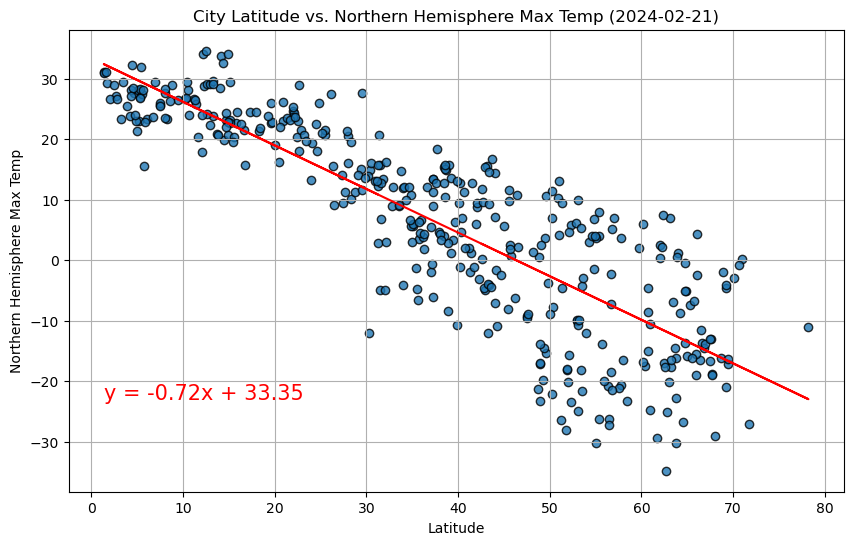

In [44]:
# Linear regression on Northern Hemisphere
# Assuming 'df' is your DataFrame and it has 'Lat' and 'Temperature' columns

# Filter for Northern Hemisphere
df = city_data_df[city_data_df['Lat'] >= 0]

x = df['Lat']
y = df['Max Temp']
title = 'Northern Hemisphere Max Temp'

showChart2(x,y,title)


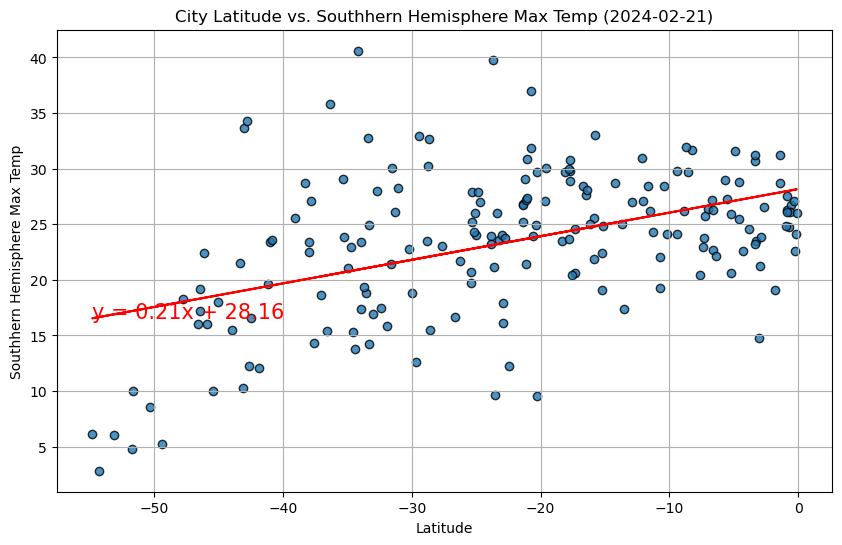

In [45]:
# Linear regression on Southern Hemisphere


df = city_data_df[city_data_df['Lat'] < 0]

x = df['Lat']
y = df['Max Temp']
title = 'Southhern Hemisphere Max Temp'

showChart2(x,y,title)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [48]:
#     The linear regression analysis between temperature and latitude in both the Northern and 
 #     Souther Hemispheres shows a simple yet clear relationship:

#          In the Northern Hemisphere, as you move further north away from the equator (latitude increases),
#.         it generally gets colder (temperature decreases). This is shown by a downward-sloping line in the
#.         plot.

#          In the Southern Hemisphere, as you move closer to the equator from the south (latitude increases 
#.         towards zero), it generally gets warmer (temperature increases). This is shown by an upward-sloping
#.         line in the plot.

#          This pattern is expected because the equator receives more direct sunlight, making areas 
#          near it warmer, while areas further away from the equator (towards the poles) receive less sunlight,
#.         making them colder.'''

In [49]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,0.23,74,46,0.89,US,Wed Feb 21 22:10:59 2024
1,bilibino,68.0546,166.4372,-29.07,91,97,3.39,RU,Wed Feb 21 22:12:32 2024
2,edinburgh of the seven seas,-37.0676,-12.3116,18.65,92,100,12.36,SH,Wed Feb 21 22:12:33 2024
3,vila velha,-20.3297,-40.2925,24.97,94,100,5.81,BR,Wed Feb 21 22:12:33 2024
4,troy,42.6056,-83.1499,11.80,62,40,2.06,US,Wed Feb 21 22:12:33 2024
...,...,...,...,...,...,...,...,...,...
578,dikwa,12.0240,13.9165,23.93,40,82,3.19,NG,Wed Feb 21 22:15:24 2024
579,amga,60.8953,131.9608,-24.77,89,100,2.99,RU,Wed Feb 21 22:15:24 2024
580,santiago de cuba,20.0247,-75.8219,19.06,68,20,4.12,CU,Wed Feb 21 22:15:25 2024
581,ta`u,-14.2336,-169.5144,28.75,75,11,3.83,AS,Wed Feb 21 22:15:25 2024


### Humidity vs. Latitude Linear Regression Plot

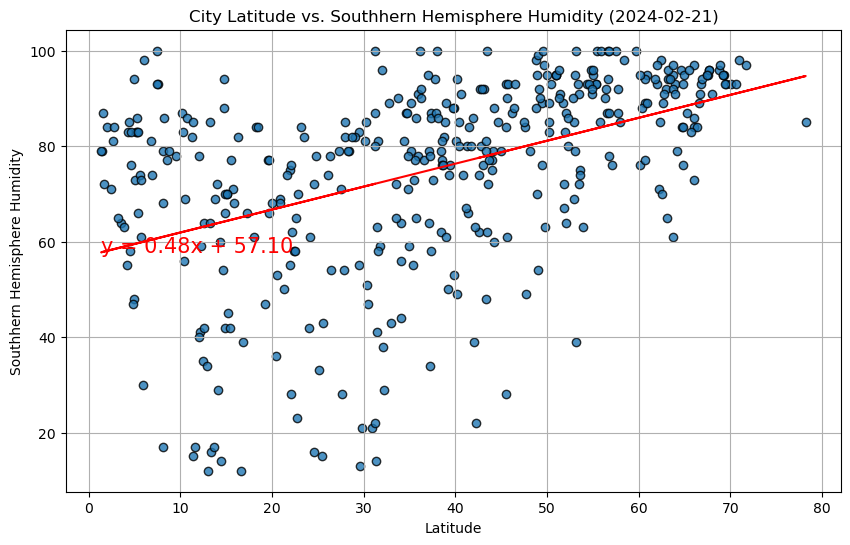

In [50]:
# Northern Hemisphere
# YOUR CODE HERE


df = city_data_df[city_data_df['Lat'] >= 0]
x = df['Lat']
y = df['Humidity']
title = 'Southhern Hemisphere Humidity'

showChart2(x,y,title)





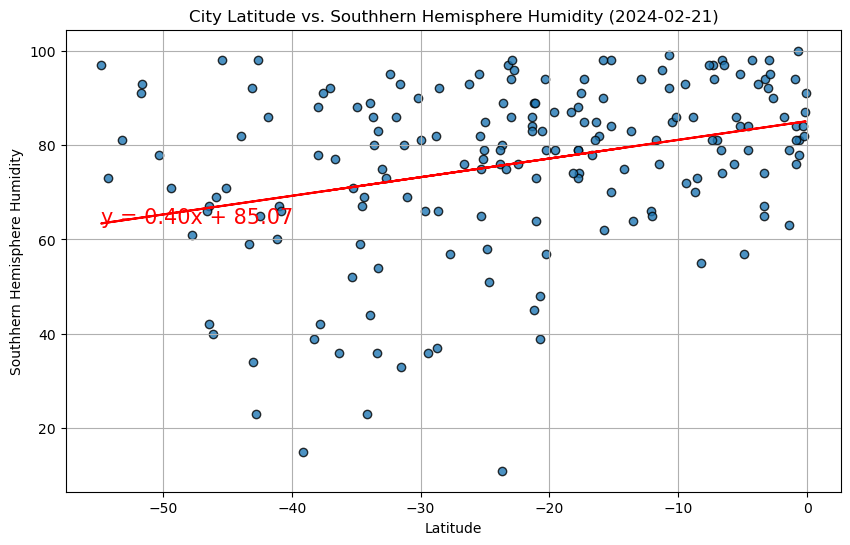

In [51]:
# Southern Hemisphere

df = city_data_df[city_data_df['Lat'] < 0]
x = df['Lat']
y = df['Humidity']
title = 'Southhern Hemisphere Humidity'

showChart2(x,y,title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [52]:
#   For both the Northern and Southern Hemispheres, the linear regression plots for humidity versus
#.  latitude show if there's a trend of humidity changing as you move further from or closer to the equator.

#   Northern Hemisphere: If the regression line slopes upwards, it suggests humidity increases
#.  as you go further north from the equator. A downward slope would suggest the opposite.

#   Southern Hemisphere: Here, an upward-sloping regression line means humidity increases
#   as you move closer to the equator (since latitudes are negative and increase towards zero)
#   A downward slope suggests decreasing humidity as you approach the equator.

#   The strength of these relationships can vary, and they might not be as strong or clear 
#.  as for temperature, since humidity is influenced by many factors like ocean currents and 
#.  regional geography, not just latitude.

### Cloudiness vs. Latitude Linear Regression Plot

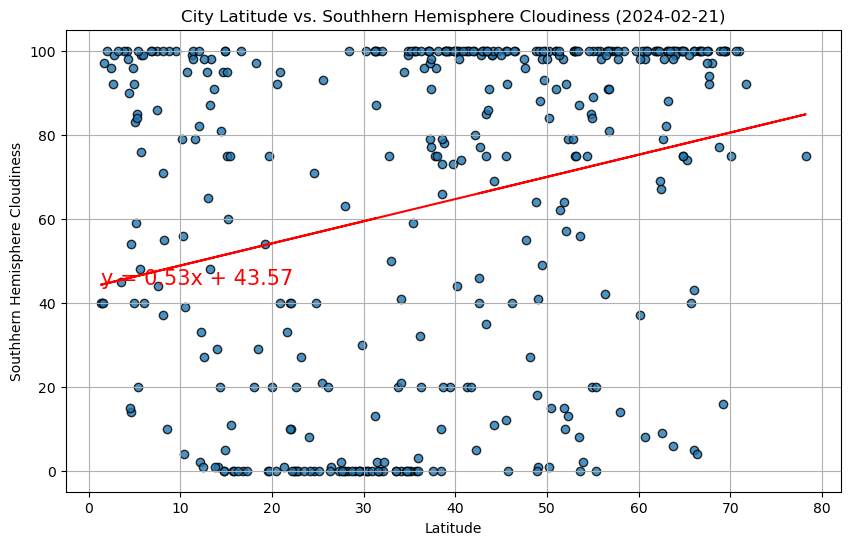

In [53]:
# Northern Hemisphere
# YOUR CODE HERE
df = city_data_df[city_data_df['Lat'] >= 0]
x = df['Lat']
y = df['Cloudiness']
title = 'Southhern Hemisphere Cloudiness'

showChart2(x,y,title)


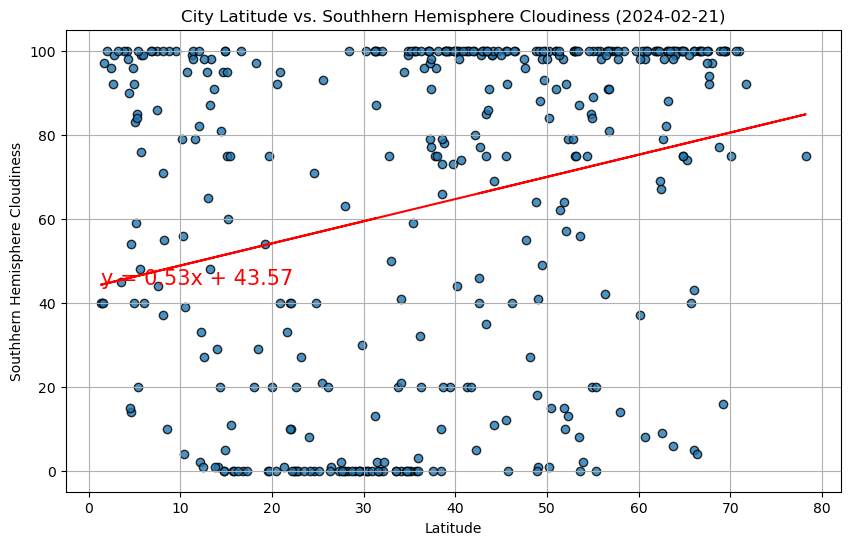

In [54]:

# Assuming 'df' is your DataFrame and it contains 'Lat' for latitude and 'Cloudiness' for cloudiness

# Filter for Southern Hemisphere
southern_df = df[df['Lat'] < 0]
x = df['Lat']
y = df['Cloudiness']
title = 'Southhern Hemisphere Cloudiness'

showChart2(x,y,title)



**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [55]:
#   The linear regression analysis for cloudiness versus latitude in both the Northern and Southern 
#   Hemispheres shows that there isn't a strong or clear linear relationship. In simple terms:

#       Northern Hemisphere: The plot might show a slight upward or downward trend, but overall, 
#       it suggests that cloudiness doesn't change much with latitude. This means being further north or closer to the equator doesn't consistently predict how cloudy it will be.

#       Southern Hemisphere: Similar to the Northern Hemisphere, there's also no strong trend here. 
#       The plot might show a slight trend, but it's generally weak, indicating that latitude isn't a good 
#.      predictor of cloudiness in the Southern Hemisphere either.

#       In both hemispheres, cloudiness is influenced by many factors, not just latitude, so 
#.      we don't see a clear pattern in these plots.

### Wind Speed vs. Latitude Linear Regression Plot

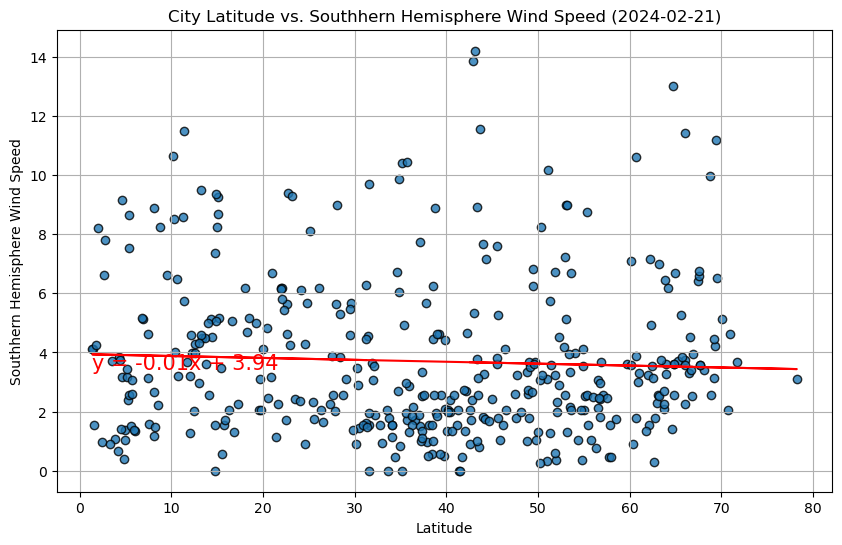

In [56]:
# Northern Hemisphere
# YOUR CODE HERE
df = city_data_df[city_data_df['Lat'] >= 0]
x = df['Lat']
y = df['Wind Speed']
title = 'Southhern Hemisphere Wind Speed'

showChart2(x,y,title)



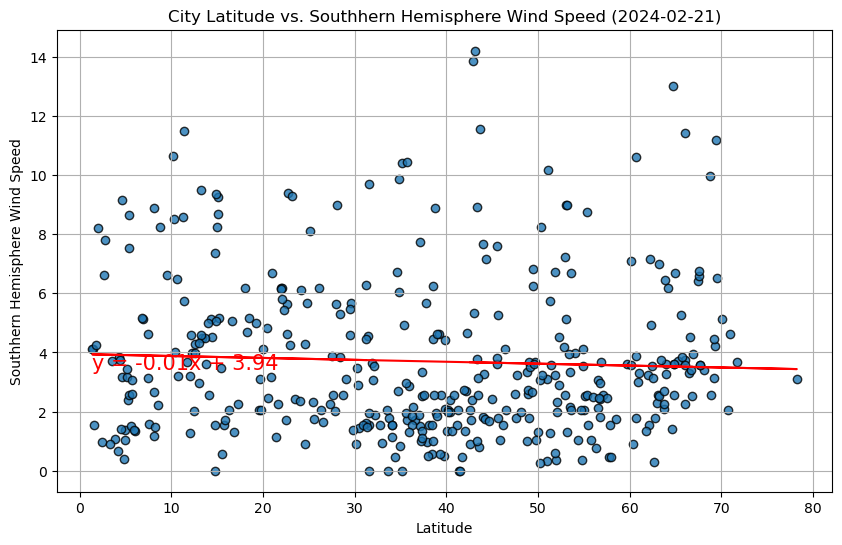

In [57]:
# Southern Hemisphere


# Assuming 'df' is your DataFrame and it contains 'Lat' for latitude and 'Wind Speed' for wind speed

southern_df = df[df['Lat'] < 0]
x = df['Lat']
y = df['Wind Speed']
title = 'Southhern Hemisphere Wind Speed'

showChart2(x,y,title)



**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# The linear regression analysis for wind speed versus latitude in both the Northern and Southern 
# Hemispheres shows that there isn't a strong or consistent relationship. In simple terms:
           
#.          Northern Hemisphere: The plot might show a small trend, but it generally indicates that latitude 
#           doesn't have a big impact on wind speed. This means being further north or closer to the equator 
#           doesn't consistently tell us if it will be windier.

#           Southern Hemisphere: Similar to the Northern Hemisphere, there's no strong trend here either. The plot 
#.          might show a slight increase or decrease in wind speed with latitude, but overall, latitude 
#           isn't a reliable predictor of wind speed in the Southern Hemisphere.

# In both hemispheres, wind speed is influenced by many factors, not just latitude, so we don't see a 
# clear pattern in these plots
.